In [3]:
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt
import os
from scipy.signal import detrend

In [23]:
df = pd.read_csv(('combined_data.csv'), index_col=0, parse_dates=True)
df = df.dropna()
df.head()

,Coast,East,Far West,North,North Central,South,South Central,West,ERCOT
hour_end,,,,,,,,,
2015-01-01 01:00:00,9844.200268,1350.784678,2078.060021,901.770195,13640.024978,3607.904503,6731.301663,1470.814721,39624.861027
2015-01-01 02:00:00,9653.456269,1333.434943,2057.993265,890.150373,13425.121941,3609.619438,6602.935629,1440.832944,39013.544802
2015-01-01 03:00:00,9502.299659,1323.908498,2039.019542,880.926639,13286.070909,3573.158363,6530.663273,1430.495044,38566.541927
2015-01-01 04:00:00,9474.478036,1325.951405,2027.431312,883.990576,13310.892590,3538.420320,6503.367925,1423.806348,38488.338511
2015-01-01 05:00:00,9554.370489,1339.675290,2026.809889,894.320303,13423.345503,3542.905394,6603.227872,1428.180823,38812.835564


In [22]:
# Detrend each numeric column using scipy.signal.detrend
detrended_df = pd.DataFrame(index=df.index)

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        # Get the data and handle NaN/infinite values
        data = df[column].copy()
        # Fill NaN values with the mean of the column
        data = data.fillna(data.mean())
        # Apply scipy's detrend function
        detrended_df[column] = detrend(data)

# Show the first few rows of the detrended data
detrended_df.head()

,Coast,East,Far West,North,North Central,South,South Central,West,ERCOT
hour_end,,,,,,,,,
2015-01-01 01:00:00,-1243.246605,21.136191,847.367442,263.514181,917.197937,430.372216,715.276926,347.538654,2298.919033
2015-01-01 02:00:00,-1434.025702,3.781179,827.241914,251.886672,702.271749,432.076053,586.883219,317.554380,1687.431545
2015-01-01 03:00:00,-1585.217410,-5.750543,808.209419,242.655252,563.197566,395.603879,514.583189,307.213982,1240.257408
2015-01-01 04:00:00,-1613.074131,-3.712912,796.562417,245.711502,587.996096,360.854737,487.260168,300.522789,1161.882729
2015-01-01 05:00:00,-1533.216776,10.005697,795.882222,256.033543,700.425859,365.328712,587.092442,304.894767,1486.208519


In [12]:
detrended_df.to_csv(os.path.join(os.getcwd(), 'detrended_data.csv'))

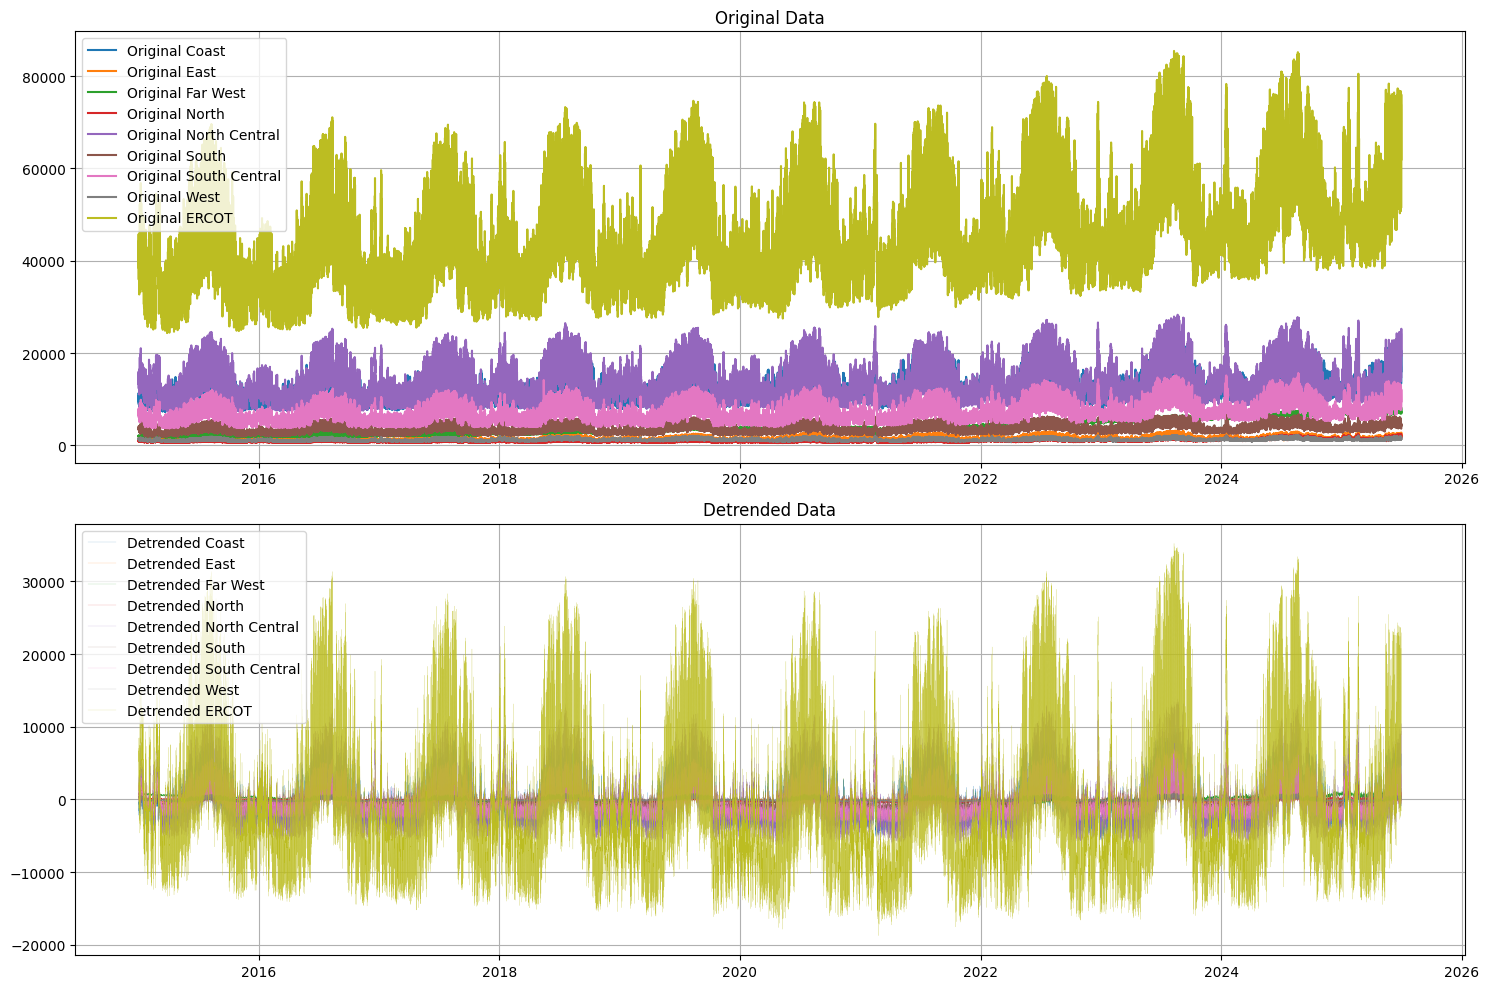

In [14]:
# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Plot for each numeric column
for i, column in enumerate(detrended_df.columns):
    if pd.api.types.is_numeric_dtype(detrended_df[column]):
        plt.subplot(2, 1, 1)
        plt.plot(df.index, df[column], label=f'Original {column}')
        plt.title('Original Data')
        plt.legend()
        plt.grid(True)
        
        plt.subplot(2, 1, 2)
        plt.plot(df.index, detrended_df[column], label=f'Detrended {column}',linewidth=0.1)
        plt.title('Detrended Data')
        plt.legend()
        plt.grid(True)

plt.tight_layout()
plt.show()

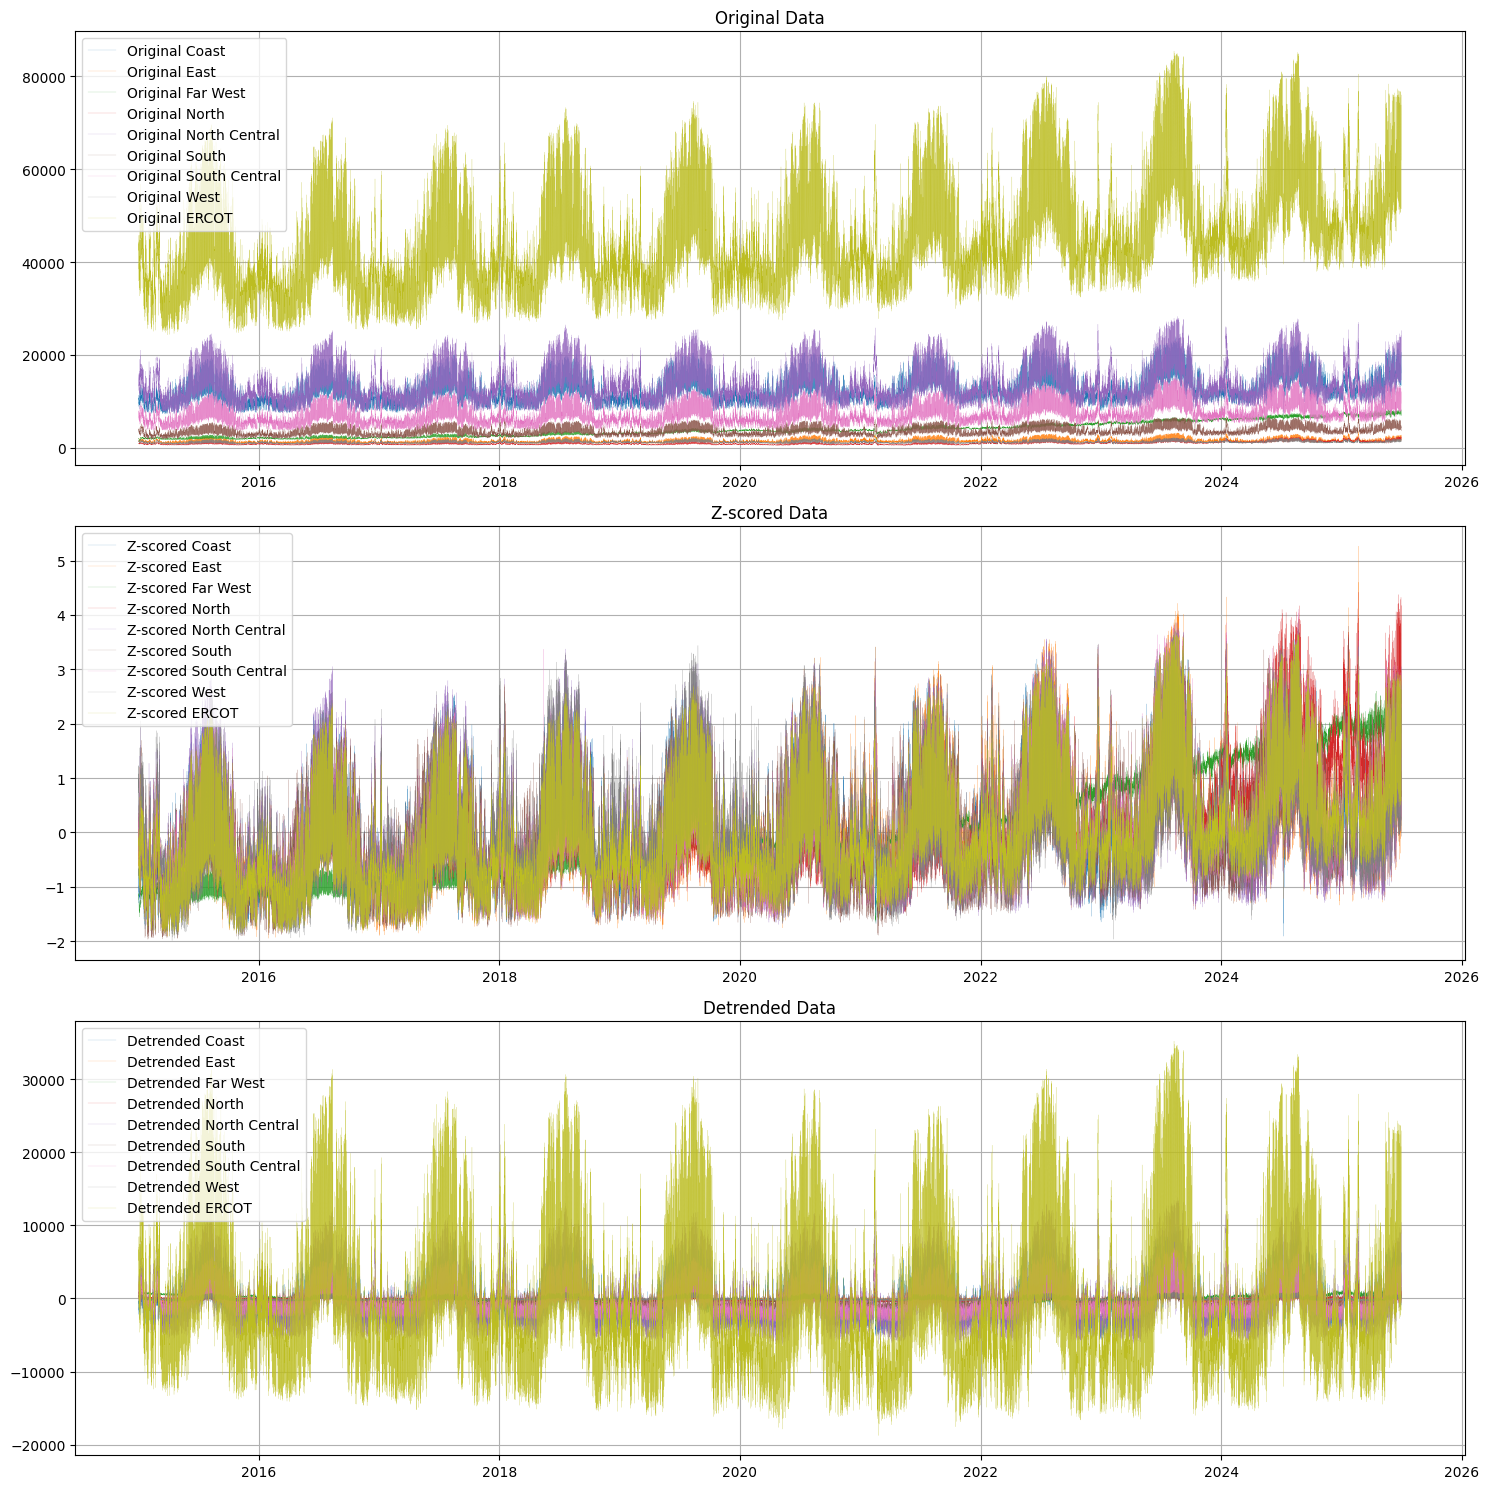


Data Statistics:

Original Data Range:
            Coast         East     Far West        North  North Central  \
min   7128.496204   786.886674  1242.334939   488.272293    7266.444409   
max  23963.415268  3696.721811  8377.258268  2443.587976   28312.541008   

           South  South Central         West         ERCOT  
min  1890.401065    3636.703558   729.523039  24337.467368  
max  7155.621786   15664.703570  2230.497660  85464.116394  

Z-scored Data Range:
        Coast      East  Far West     North  North Central     South  \
min -1.909675 -1.948011 -1.654275 -1.533104      -1.731748 -1.967722   
max  3.858517  5.268363  2.730270  4.419745       3.857039  3.795468   

     South Central      West     ERCOT  
min      -1.790411 -1.989527 -1.914177  
max       4.105810  3.881433  3.693131  

Detrended Data Range:
            Coast         East     Far West        North  North Central  \
min  -6887.049867  -758.421319 -3144.175941  -579.487394   -6396.878210   
max  10224.79368

In [16]:
# Create z-scored dataframe
z_scored_df = pd.DataFrame(index=df.index)
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        z_scored_df[column] = (df[column] - df[column].mean()) / df[column].std()

# Create a figure with subplots
plt.figure(figsize=(15, 15))

# Plot original data
plt.subplot(3, 1, 1)
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.plot(df.index, df[column], label=f'Original {column}', linewidth=0.1)
plt.title('Original Data')
plt.legend()
plt.grid(True)

# Plot z-scored data
plt.subplot(3, 1, 2)
for column in z_scored_df.columns:
    if pd.api.types.is_numeric_dtype(z_scored_df[column]):
        plt.plot(df.index, z_scored_df[column], label=f'Z-scored {column}', linewidth=0.1)
plt.title('Z-scored Data')
plt.legend()
plt.grid(True)

# Plot detrended data
plt.subplot(3, 1, 3)
for column in detrended_df.columns:
    if pd.api.types.is_numeric_dtype(detrended_df[column]):
        plt.plot(df.index, detrended_df[column], label=f'Detrended {column}', linewidth=0.1)
plt.title('Detrended Data')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print some statistics
print("\nData Statistics:")
print("\nOriginal Data Range:")
print(df.describe().loc[['min', 'max']])
print("\nZ-scored Data Range:")
print(z_scored_df.describe().loc[['min', 'max']])
print("\nDetrended Data Range:")
print(detrended_df.describe().loc[['min', 'max']])

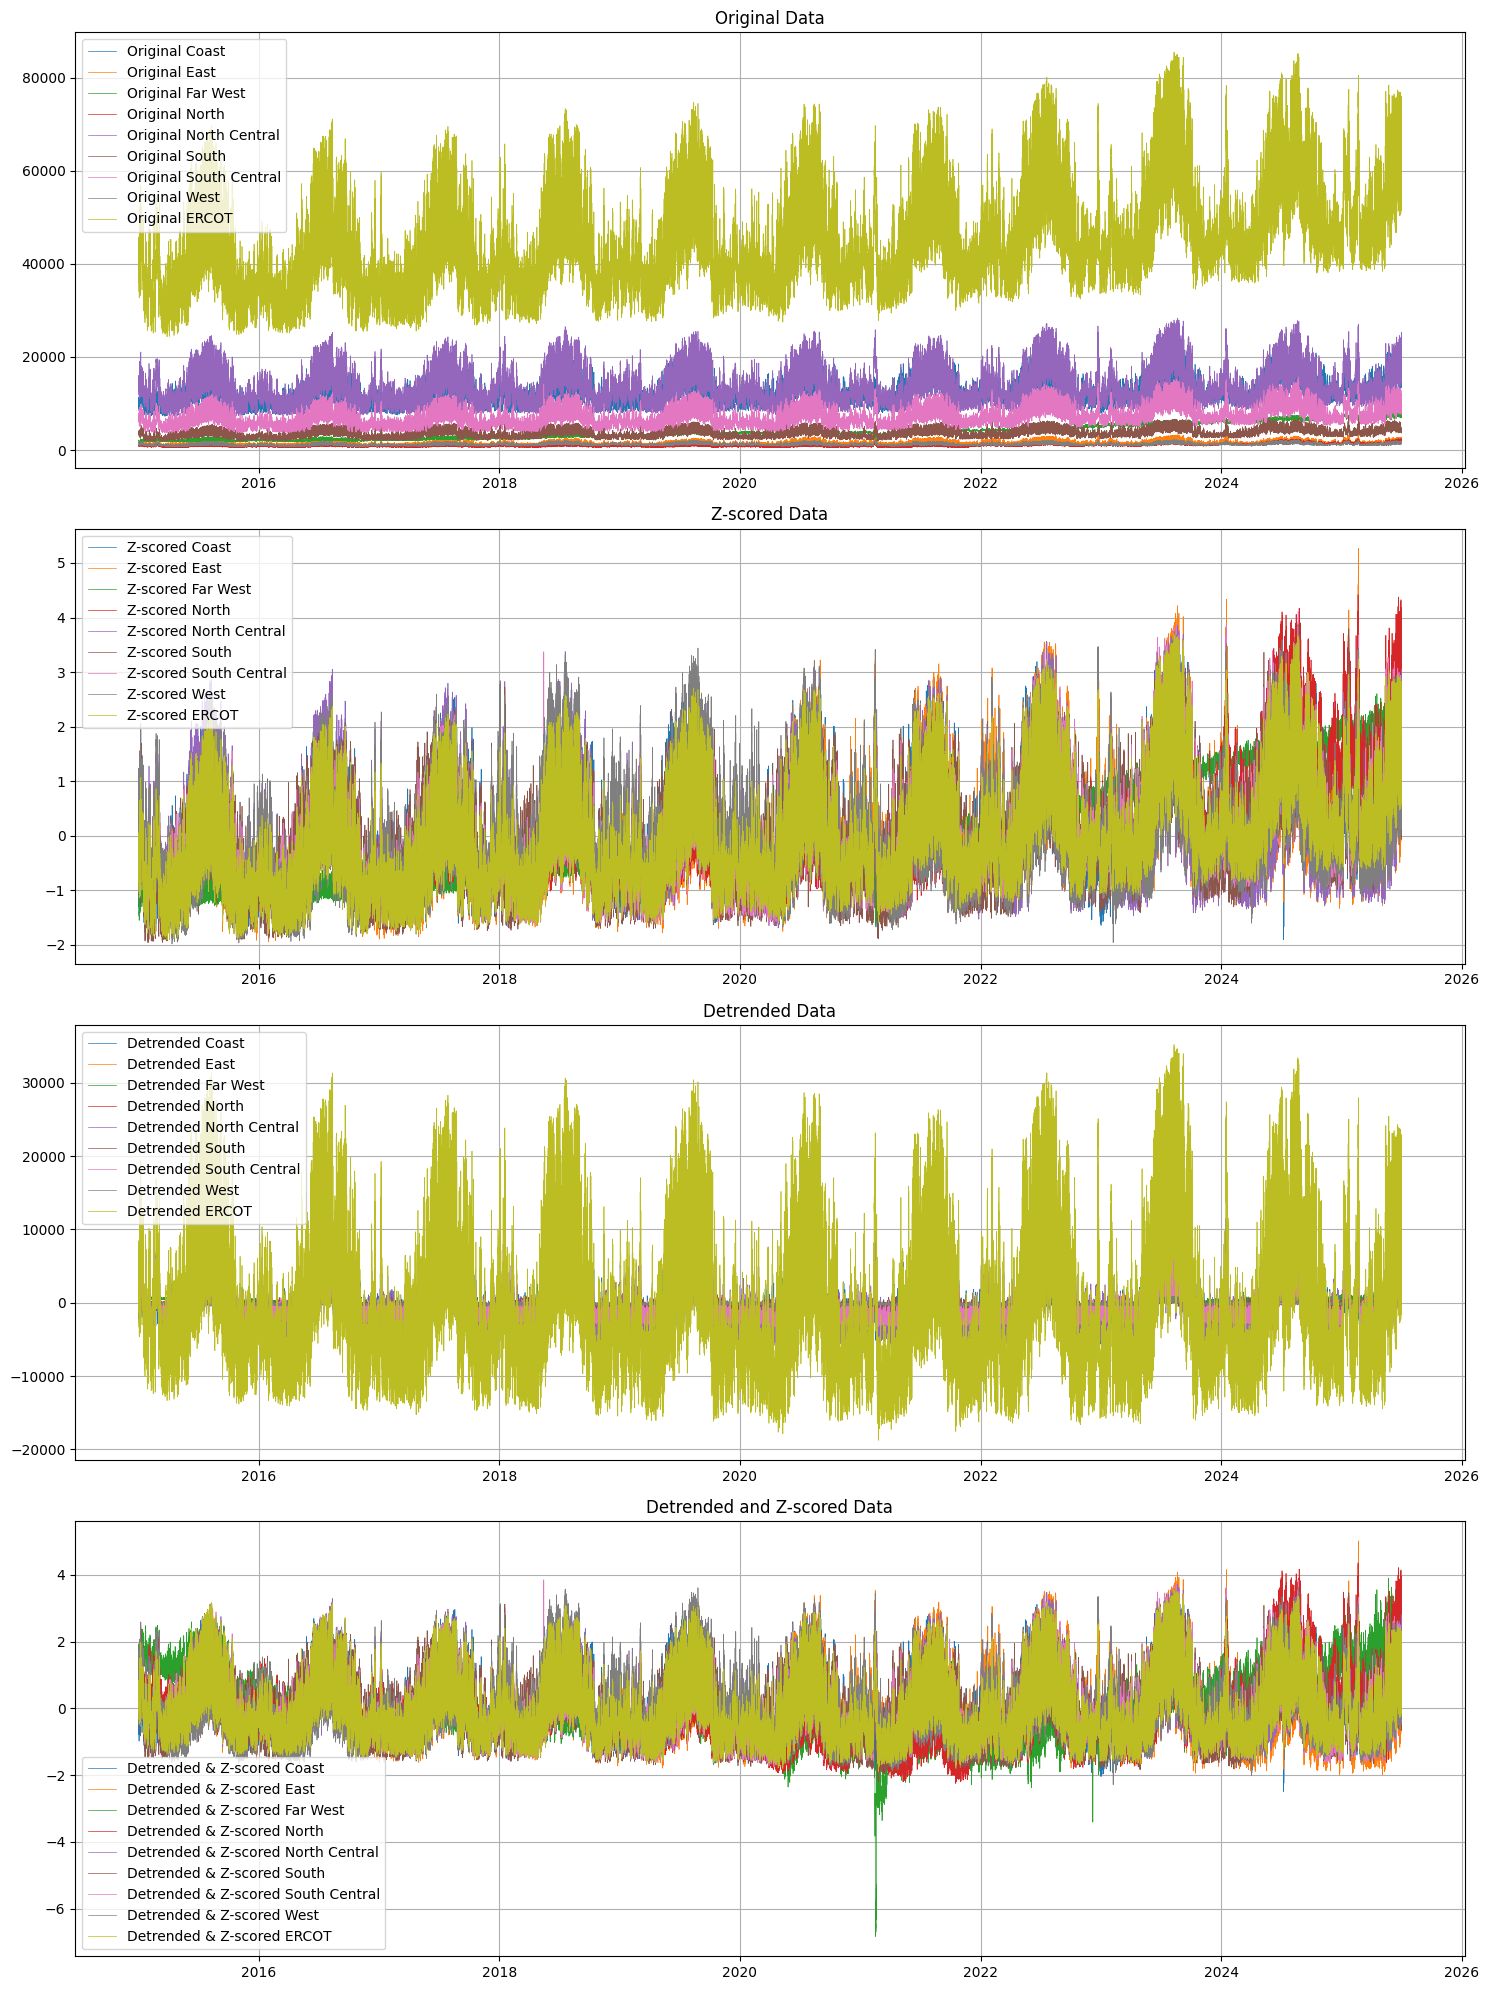


Combined (Detrended + Z-scored) Data Statistics:
        Coast      East  Far West     North  North Central     South  \
min -2.490177 -2.005938 -6.837501 -2.252018      -1.721806 -2.101148   
max  3.697018  5.020399  3.903056  4.361902       3.724437  3.468694   

     South Central      West     ERCOT  
min      -1.756102 -2.287664 -1.893377  
max       3.853786  3.629802  3.554910  


In [18]:
# Create combined z-scored and detrended dataframe
combined_df = pd.DataFrame(index=df.index)
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        # First detrend, then z-score
        detrended = detrend(df[column])
        combined_df[column] = (detrended - detrended.mean()) / detrended.std()

# Create a figure with subplots
plt.figure(figsize=(15, 20))

# Plot original data
plt.subplot(4, 1, 1)
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.plot(df.index, df[column], label=f'Original {column}', linewidth=0.5)
plt.title('Original Data')
plt.legend()
plt.grid(True)

# Plot z-scored data
plt.subplot(4, 1, 2)
for column in z_scored_df.columns:
    if pd.api.types.is_numeric_dtype(z_scored_df[column]):
        plt.plot(df.index, z_scored_df[column], label=f'Z-scored {column}', linewidth=0.5)
plt.title('Z-scored Data')
plt.legend()
plt.grid(True)

# Plot detrended data
plt.subplot(4, 1, 3)
for column in detrended_df.columns:
    if pd.api.types.is_numeric_dtype(detrended_df[column]):
        plt.plot(df.index, detrended_df[column], label=f'Detrended {column}', linewidth=0.5)
plt.title('Detrended Data')
plt.legend()
plt.grid(True)

# Plot combined transformation (detrended + z-scored)
plt.subplot(4, 1, 4)
for column in combined_df.columns:
    if pd.api.types.is_numeric_dtype(combined_df[column]):
        plt.plot(df.index, combined_df[column], label=f'Detrended & Z-scored {column}', linewidth=0.5)
plt.title('Detrended and Z-scored Data')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print statistics for the combined transformation
print("\nCombined (Detrended + Z-scored) Data Statistics:")
print(combined_df.describe().loc[['min', 'max']])